In [1]:
# call libraries
include("../src/Regression/simple_regression.jl")
using Plots

---x,yの基本統計量---
x̄ = 0.0, ȳ = 4.242615110559939
σ(x)=6.0553007081949835, σ(y) =12.841332513777502
---回帰直線パラメータ---
a=2.0554410415118056, b=4.242615110559939
---決定係数---
R²=0.9394232292244291


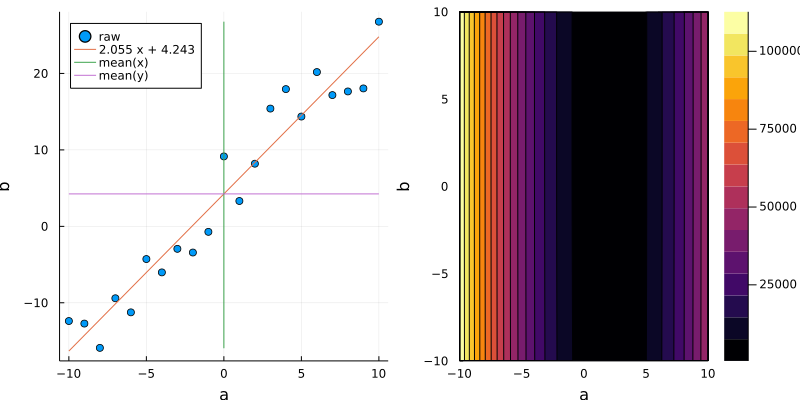

In [2]:
# データ定義
xs = [x for x in (-10:10)]
ys = [2*x + 10*rand() for x in xs]

# 平均
m_x = mean(xs);m_y = mean(ys)
st_x = stdev(xs);st_y = stdev(ys)
println("---x,yの基本統計量---")
println("x̄ = $m_x, ȳ = $m_y")
println("σ(x)=$st_x, σ(y) =$st_y")

# 回帰直線式算出
(a,b) = simple_regression(xs,ys)
println("---回帰直線パラメータ---")
println("a=$a, b=$b")

# 目的変数の推定値
yhats = [a*x + b for x in xs]

# 決定係数
println("---決定係数---")
println("R²=$(variance(yhats)/variance(ys))")

# 生データと回帰直線
plot1 = scatter(xs,ys, lab="raw",legend=:topleft)
dec = 1000
plot!(xs,yhats,lab="$(round(a*dec)/dec) x + $(round(b*dec)/dec)")
plot!(map(y->m_x,ys), ys, label="mean(x)")
plot!(xs, (x)->m_y, label="mean(y)")

# 平均二乗残差
f_msr = mean_square_residual(xs,ys)
plot2 = contour(-10:10, -10:10, f_msr, fill = true)

plot(plot1,plot2,size=(800,400),xlabel="a",ylabel="b")